In [2]:
from glucose_sbi.utils import load_results, Results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import torch
import logging
from glucose_sbi.infer_parameters import DeafultSimulationEnv
from glucose_sbi.prepare_priors import Prior
from glucose_sbi.glucose_simulator import run_glucose_simulator
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
results_folder = Path("glucose_sbi/results/2025-02-14_08-36")

In [4]:
results = load_results(results_folder)

In [5]:
x_true = results.true_observation
posterior_samples = results.posterior_samples
true_parameters = results.true_params
default_settings = results.default_settings
prior = results.prior

In [ ]:
print(true_parameters)
theta_true = torch.tensor([value for key, value in true_parameters.items()]).to(device)
#theta_true = theta_true.unsqueeze(0)


{'x0_10': 4.96870842374, 'x0_11': 77.8484760287, 'x0_12': 47.1721248798, 'x0_13': 280.236267, 'BW': 51.046, 'EGPb': 2.4905, 'Gb': 152.41, 'Ib': 119.18, 'kabs': 0.12473, 'kmax': 0.034573, 'kmin': 0.006983, 'b': 0.76876, 'd': 0.18887, 'Vg': 1.8387, 'Vi': 0.050506, 'Ipb': 6.01930508, 'Vmx': 0.038897, 'Km0': 223.01, 'k2': 0.28643, 'k1': 0.036957, 'p2u': 0.017681, 'm1': 0.14477, 'm5': 0.036533, 'CL': 0.77023, 'HEb': 0.6, 'm2': 0.298755383281, 'm4': 0.119502153313, 'm30': 0.217155, 'Ilb': 4.96870842374, 'ki': 0.0084603, 'kp2': 0.0026879, 'kp3': 0.0079949, 'Gpb': 280.236267, 'Gtb': 30.9541309204, 'Vm0': 12.228853658, 'Rdb': 2.4905, 'PCRb': 0.0163407912867, 'kd': 0.0163, 'ksc': 0.1314, 'ka1': 0.0068, 'ka2': 0.0269, 'u2ss': 1.79829979626, 'isc1ss': 77.8484760287, 'isc2ss': 47.1721248798, 'kp1': 4.19657924407}


In [7]:
theta_true.shape

torch.Size([45])

In [8]:
x_true.shape

torch.Size([481])

In [9]:
pathos = True

In [11]:
sim_long_true = run_glucose_simulator(theta=[theta_true], default_settings=default_settings, prior = prior, device=device, hours = 72)
sim_long_inferred = run_glucose_simulator(theta=posterior_samples, default_settings=default_settings, prior = prior, device=device, hours = 72)

Using pathos multiprocessing
Using pathos multiprocessing


In [19]:
print(sim_long_true.shape)
print(sim_long_inferred.shape)
print(sim_long_true.shape[1])

torch.Size([1, 1441])
torch.Size([1000, 1441])
1441


In [8]:
def plot_simulation(
    x_true: torch.Tensor, x_inferred: torch.Tensor, save_path: str | None = None
) -> tuple[plt.Figure, plt.Axes]:
    """Plot the results of a simulation.

    Parameters
    ----------
    x_true : torch.Tensor
        Glucose dynamics with true parameters.
    x_inferred : torch.Tensor
        Glucose dynamics with inferred parameters.
    save_path : str | None, optional
        Directory to save the figure, by default None

    Returns
    -------
    tuple[plt.Figure, plt.Axes]
        The figure and axes of the plot.

    """
    x_true_array = x_true.cpu().numpy()
    x_inferred_array = x_inferred.cpu().numpy()
    print(x_true_array.shape)

    mean_x_inf = np.mean(x_inferred_array, axis=0)
    std_x_inf = np.std(x_inferred_array, axis=0)
    timeline = np.arange(0,1441)
    print(timeline.shape)

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    ax.plot(
        timeline, x_true_array[0], label="Simulation with true parameters", color="lime"
    )

    ax.plot(timeline, mean_x_inf, label="Mean a-posteriori simulation", color="black")
    ax.fill_between(
        timeline,
        mean_x_inf - std_x_inf,
        mean_x_inf + std_x_inf,
        color="black",
        alpha=0.3,
    )

    ax.set_xlabel("Time, min")
    ax.set_ylabel("CGM")
    ax.legend(loc = "lower left")
    sns.despine()
    plt.tight_layout()
    plt.show()
    if save_path:
        plt.savefig(Path(save_path) / "results.png")
    return fig, ax

(1, 1441)
(1441,)


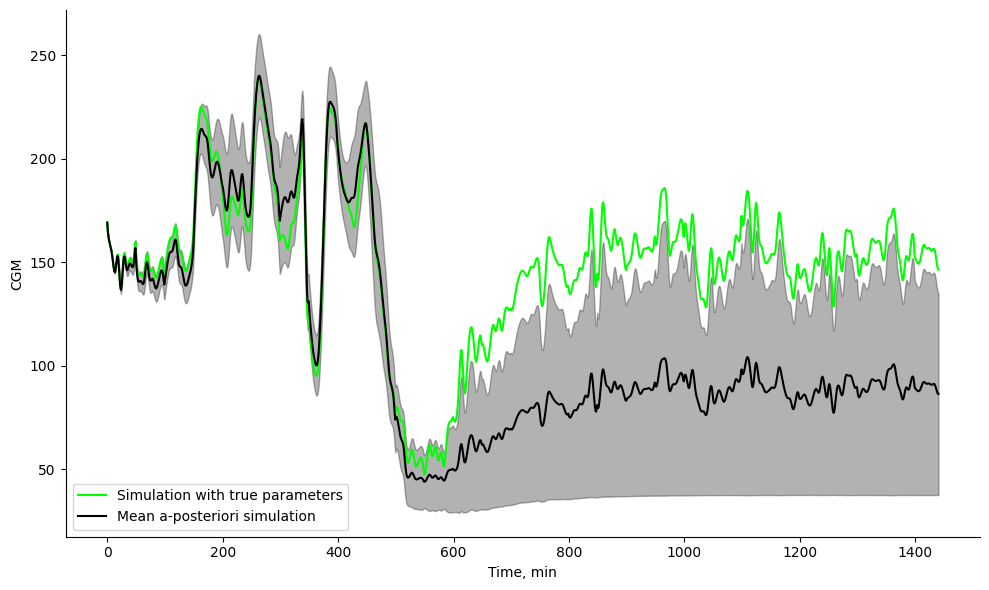

In [38]:
fig, ax = plot_simulation(sim_long_true, sim_long_inferred)

In [10]:
results_folder = Path("glucose_sbi/results/2025-02-17_18-34")
results = load_results(results_folder)
x_true = results.true_observation
posterior_samples = results.posterior_samples
true_parameters = results.true_params
default_settings = results.default_settings
prior = results.prior
theta_true = torch.tensor([value for key, value in true_parameters.items()]).to(device)

In [11]:
pathos = True

In [12]:
sim_long_true = run_glucose_simulator(theta=[theta_true], default_settings=default_settings, prior = prior, device=device, hours = 72)
sim_long_inferred = run_glucose_simulator(theta=posterior_samples, default_settings=default_settings, prior = prior, device=device, hours = 72)

Using pathos multiprocessing
Using pathos multiprocessing


(1, 1441)
(1441,)


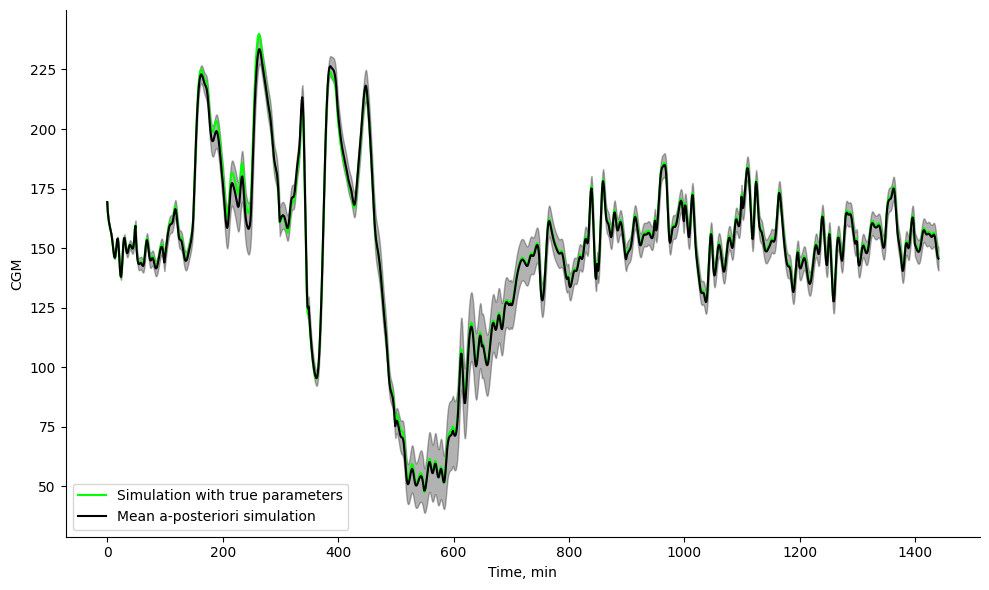

In [14]:
fig, ax = plot_simulation(sim_long_true, sim_long_inferred)